In [265]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [266]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="deepseek-r1-distill-llama-70b")
llm.invoke("What is the weather in delhi?")

AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, you can easily check the current weather in Delhi using reliable weather websites, apps, or services like [AccuWeather](https://www.accuweather.com/), [Weather.com](https://www.weather.com/), or local Indian meteorological services. For the most accurate and up-to-date information, enable location services on your device or search for "Delhi weather" online.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 103, 'prompt_tokens': 11, 'total_tokens': 114, 'completion_time': 0.374545455, 'prompt_time': 0.000354363, 'queue_time': 0.053330596999999993, 'total_time': 0.374899818}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'finish_reason': 'stop', 'logprobs': None}, id='run--93a6139a-b8ab-4bae-942c-b7e534ad785c-0', usage_metadata={'input_tokens': 11, 'output_tokens': 103, 'total_tokens': 

In [267]:
print(llm.invoke("What is the weather in delhi?").content)

<think>

</think>

As of my last update in July 2024, I cannot provide real-time weather information. However, you can easily check the current weather in Delhi using reliable weather websites, apps, or services like [AccuWeather](https://www.accuweather.com/), [Weather.com](https://www.weather.com/), or local news sources. Delhi typically experiences a hot and humid climate during the summer months (April to July), a monsoon season from July to September, and a cooler winter from November to February.


In [268]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode,tools_condition

Custom tools

In [269]:
@tool
def multipy(a:int,b:int)->int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a:int,b:int)->int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The addition of a and b.
    """
    return a + b

@tool
def divide(a:int,b:int)->int:
    """
    Divide two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The divsion of a and b.
    """
    if(b==0):
        raise ValueError("Division by zero is not allowed.")
    return a/b

Built in tool

In [270]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()

In [271]:
search.invoke("What is the weather in delhi?")

a:\Agentic\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


'Be prepared with the most accurate 10-day forecast for Himayatnagar, Telangana with highs, lows, chance of precipitation from The Weather Channel and Weather.com Himayatnagar, Telangana, India Weather Forecast, with current conditions, wind, air quality, and what to expect for the next 3 days. Get accurate hourly forecasts for today, tonight, and tomorrow, along with 10-day daily forecasts and weather radar for Himayatnagar, Telangana, India with MSN Weather. Jun 24, 2025 · Current weather in Himayatnagar and forecast for today, tomorrow, and next 14 days Jul 9, 2025 · Weather in Telangana, Himayatnagar: Get the current weather, hourly and weekly weather forecast for Himayatnagar, along with current temperature, rainfall, wind speed, …'

In [272]:
tools=[multipy,add,divide,search]

In [273]:
llm_with_tools=llm.bind_tools(tools)

In [274]:
response =llm_with_tools.invoke("What is the weather in delhi?")

In [275]:
response.content

''

In [276]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'weather in Delhi'},
  'id': 'hr8d0m728',
  'type': 'tool_call'}]

In [277]:
response=llm_with_tools.invoke("what is 2+2 ?")

In [278]:
response.content

''

In [279]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'ezs2yevk1',
  'type': 'tool_call'}]

In [280]:
response =llm_with_tools.invoke("what is the current age of the universe?")

In [281]:
response

AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking about the current age of the universe. I need to find the most accurate and up-to-date information on this. I remember that the age of the universe is a commonly discussed topic in cosmology, but I\'m not exactly sure of the exact figure. I think it\'s around 13.8 billion years, but I should verify this to provide the correct information.\n\nI should use the DuckDuckGo search tool to look this up. The function for that is called duckduckgo_search, and it requires a query parameter. So, I\'ll set up the tool call with the name as "duckduckgo_search" and the arguments as a JSON object containing the query "current age of the universe".\n\nAfter making the search, I\'ll receive the results, which I can then use to provide an accurate answer to the user. I need to make sure the information I present is reliable and based on credible sources. If the search results confirm the 13.8 billion years figure

In [282]:
response.content

''

In [283]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'current age of the universe'},
  'id': '0ebrfyq44',
  'type': 'tool_call'}]

In [284]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [285]:
user_query=["tell me what is 2+2"]

In [286]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [287]:
def function_1(state:MessagesState):
    user_question=state['messages']
    input_question=[SYSTEM_PROMPT]+user_question
    response=llm_with_tools.invoke(input_question)
    return {
        "messages":[response]
    }

In [288]:
builder=StateGraph(MessagesState)

In [289]:
builder.add_node("llm_decision",function_1)

In [290]:
tools

[StructuredTool(name='multipy', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multipy'>, func=<function multipy at 0x000001B1937A18A0>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The addition of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001B1937A0360>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The divsion of a and b.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001B1937A1F80>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_resul

In [291]:
builder.add_node("tools",ToolNode(tools))

In [292]:
builder.add_edge(START,"llm_decision")

In [293]:
builder.add_conditional_edges(
    "llm_decision",
    tools_condition
)

In [294]:
builder.add_edge( "tools","llm_decision")

In [295]:
react=builder.compile()

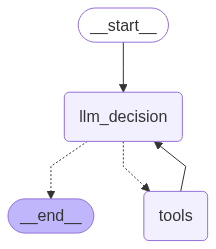

In [296]:
from IPython.display import Image, display
display(Image(react.get_graph().draw_mermaid_png()))

In [297]:
message=[HumanMessage(content="What is 2 times of narendra modi's age?")]

In [298]:
react.invoke({"messages": message})

a:\Agentic\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content="What is 2 times of narendra modi's age?", additional_kwargs={}, response_metadata={}, id='bbd17374-a5e0-4252-be68-01479df97ba7'),
  AIMessage(content="First, I'll search for Narendra Modi's age. Then, I'll use the multiply function to calculate twice his age.\n\n", additional_kwargs={'reasoning_content': "Alright, I need to figure out how to find 2 times Narendra Modi's age. First, I should probably look up his current age. I'll use the DuckDuckGo tool for that. Once I have his age, I can then multiply it by 2 using the multiply function. Let me start by searching for his age.\n", 'tool_calls': [{'id': 'qjvwm5zgy', 'function': {'arguments': '{"query":"Narendra Modi age 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 187, 'prompt_tokens': 424, 'total_tokens': 611, 'completion_time': 0.68, 'prompt_time': 0.034942718, 'queue_time': 0.059592281999999996, 'total_time': 0.714942718}, 'mo

In [299]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [300]:
react.invoke({"messages": message})

a:\Agentic\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='dcc2e6ef-302e-4d33-8729-24d3fd55c5b2'),
  AIMessage(content="First, I will search for Elon Musk's current net worth.\n\n", additional_kwargs={'reasoning_content': "Alright, so the user is asking about Elon Musk's net worth and then dividing it by two. I need to figure this out step by step. First, I don't have real-time data, so I'll start by using the DuckDuckGo search tool to find the current net worth of Elon Musk.\n\nOnce I have that information, the next step is to divide the net worth by 2. I'll use the divide function for that. I need to make sure that the numbers are accurate and in the correct format for the function to work properly.\n\nI should also consider the possibility that the net worth figure might be in a different currency or format, so I'll need to handle that if necessary. After performing the division, I'll present the 

In [301]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]
response=react.invoke({"messages":message})

a:\Agentic\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


In [302]:

response["messages"][-1].content

'The speed of light in a vacuum is approximately 299,792,458 meters per second. Multiplying this value by 10 gives:\n\n299,792,458 m/s × 10 = 2,997,924,580 m/s\n\n**Answer:** 2,997,924,580 m/s'

In [303]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================

To determine the speed of light in meters per second and multiply it by 10, I'll first confirm the exact value using DuckDuckGo and then perform the multiplication.
Tool Calls:
  duckduckgo_search (he7gz291b)
 Call ID: he7gz291b
  Args:
    query: speed of light in m/s
================================= Tool Message =================================
Name: duckduckgo_search

May 28, 2025 · The speed of light in air is approximately 3 × 10⁸ m/s, a key constant in physics that’s close to its speed in a vacuum. It underpins concepts like optics and relativity, powers … Jan 8, 2025 · Light travels at a constant speed of 299,792,458 metres per second (approximately 300,000 kilometres per second or 186,000 miles per second). This speed is denoted by the … Dec 26, 2024 · The sp

In [304]:
import yfinance as yf

In [305]:

@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [306]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $210.02.'

In [307]:
get_stock_price.invoke("HAL")

'The last closing price of HAL was $21.54.'

In [308]:
tools

[StructuredTool(name='multipy', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multipy'>, func=<function multipy at 0x000001B1937A18A0>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The addition of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001B1937A0360>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The divsion of a and b.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001B1937A1F80>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_resul

In [309]:
tools=[multipy,add,divide,search,get_stock_price]

In [310]:
llm_with_tools = llm.bind_tools(tools)

In [311]:

response=llm_with_tools.invoke("can you give me  stock price of adani greens?")

In [312]:
response.content

''

In [313]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 'edj9tst9m',
  'type': 'tool_call'}]

In [314]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [315]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

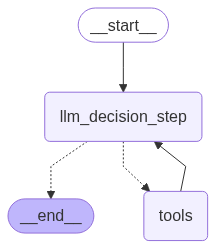

In [316]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [317]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [318]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================

To add 1000 to the current stock price of Apple (AAPL), we'll first retrieve the stock price and then perform the addition.

**Step 1: Get the current stock price of Apple**
```xml
Tool Calls:
  get_stock_price (2hczyyzvm)
 Call ID: 2hczyyzvm
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $210.02.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (2hczyyzvm)
 Call ID: 2hczyyzvm
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $210.02.
================================== Ai Message ============

use good resaoning model to run complex query

In [ ]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [ ]:
for m in messages['messages']:
    m.pretty_print()